In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv


In [2]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")

In [5]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df["status"].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [8]:
df.dropna(inplace=True)

**Tokenizer**

In [9]:
word_list=[]
for i in df["statement"]:
    word_list.append(word_tokenize(i))

In [10]:
df["word"]=word_list

remove punctuation

In [11]:
no_punct=[]
for i in df["statement"]:
    no_punct.append(RegexpTokenizer("[A-Z]|[a-z]+").tokenize(i))

In [12]:
df["no_punct_word"]=no_punct

In [13]:
#converting the text into lower case

word_lower=[]
for i in df["no_punct_word"]:
    word_lower_row=[]
    for j in i:
        word_lower_row.append(j.lower())
    word_lower.append(word_lower_row)


In [14]:
df["word_lower"]=word_lower

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
no_stopword=[]
for i in df["word_lower"]:
    word_row=[]
    for j in i:
        if j not in stopwords.words("english"):
            word_row.append(j)
    no_stopword.append(word_row)

In [17]:
df["no_stopword"]=no_stopword

In [18]:
df.head()

,Unnamed: 0,statement,status,word,no_punct_word,word_lower,no_stopword
0,0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[A, ll, wrong, back, off, dear, forward, doubt...","[a, ll, wrong, back, off, dear, forward, doubt...","[wrong, back, dear, forward, doubt, tay, restl..."
3,3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[I, ve, shifted, my, focus, to, something, els...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]"
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[I, m, restless, and, restless, it, s, been, a...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, w, hat, mean]"


In [19]:
#lemmatization

In [20]:
word_lemma=[]
for i in df["no_stopword"]:
    row=[]
    for j in i:
        row.append(WordNetLemmatizer().lemmatize(j))
    word_lemma.append(row)

In [21]:
df["word_lemma"]=word_lemma

In [22]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [23]:
word_tag=[]
for i in df["word_lemma"]:
    word_tag.append(nltk.pos_tag(i))
   

In [24]:
df["pos_tag"]=word_tag

In [25]:
df.head()

,Unnamed: 0,statement,status,word,no_punct_word,word_lower,no_stopword,word_lemma,pos_tag
0,0,oh my gosh,Anxiety,"[oh, my, gosh]","[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[All, wrong, ,, back, off, dear, ,, forward, d...","[A, ll, wrong, back, off, dear, forward, doubt...","[a, ll, wrong, back, off, dear, forward, doubt...","[wrong, back, dear, forward, doubt, tay, restl...","[wrong, back, dear, forward, doubt, tay, restl...","[(wrong, JJ), (back, RB), (dear, JJ), (forward..."
3,3,I've shifted my focus to something else but I'...,Anxiety,"[I, 've, shifted, my, focus, to, something, el...","[I, ve, shifted, my, focus, to, something, els...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[I, 'm, restless, and, restless, ,, it, 's, be...","[I, m, restless, and, restless, it, s, been, a...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, w, hat, mean]","[restless, restless, month, boy, w, hat, mean]","[(restless, JJ), (restless, JJ), (month, NN), ..."


In [26]:
#filter the noun tags

In [27]:
noun_tag=[]
for i in df["pos_tag"]:
    pos_row=[]
    for j in i:
        if j[1].startswith("NN"):
            pos_row.append(j[0])
    noun_tag.append(pos_row)

In [28]:
df["noun_tag"]=noun_tag

In [29]:
#generate a word cloud
words=[]
for i in df["noun_tag"]:
    for j in i:
        words.append(j)
    

In [30]:
word_str=",".join(words)

In [31]:
wc=WordCloud(background_color="black",max_words=5000,contour_color="blue")

In [32]:
wc.generate(word_str)

In [33]:
import matplotlib.pyplot as plt

In [34]:
plt.figure(figsize=(70,70))

<Figure size 7000x7000 with 0 Axes>

<Figure size 7000x7000 with 0 Axes>

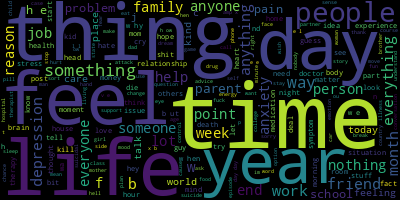

In [35]:
wc.to_image()

In [36]:
#converting lists to string

In [37]:
str_list=[]
for i in df["noun_tag"]:
    str_list.append(",".join(i))
    

In [38]:
str_list[0:11]

['gosh',
 'trouble,mind,heart,tune',
 'doubt,tay,restless,restless,place',
 'focus,something',
 'month,boy,mean',
 'break,something,heck',
 'feel,nd,family',
 'h,know',
 'day,restless,huh',
 'cry',
 'restless,night']

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
v1=CountVectorizer().fit_transform(str_list)

In [41]:
v1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
x_tr,x_test,y_tr,y_test=train_test_split(v1,df["status"],test_size=.2)

In [45]:
logit_mod=LogisticRegression().fit(x_tr,y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
p=logit_mod.predict(x_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,p))

                      precision    recall  f1-score   support

             Anxiety       0.72      0.62      0.67       775
             Bipolar       0.73      0.59      0.65       581
          Depression       0.65      0.64      0.64      3079
              Normal       0.80      0.94      0.86      3274
Personality disorder       0.59      0.45      0.51       235
              Stress       0.53      0.37      0.44       519
            Suicidal       0.58      0.54      0.56      2074

            accuracy                           0.69     10537
           macro avg       0.66      0.59      0.62     10537
        weighted avg       0.68      0.69      0.68     10537



In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [50]:
#for roc need to convert the target variable to numbers

In [51]:
y=LabelEncoder().fit_transform(df["status"])

In [52]:
x_tr,x_test,y_tr,y_test=train_test_split(v1,y,test_size=0.2)

In [53]:
logit_mod2=LogisticRegression().fit(x_tr,y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
p2=logit_mod2.predict_proba(x_test)

In [55]:
len(y_test)

10537

In [56]:
len(p2)

10537

In [57]:
auc=roc_auc_score(y_test,p2,multi_class='ovr')

In [58]:
auc

0.8942844109608014